Note: The code cells in this notebook must be run in order from top to bottom to get the correct results.

**Assignment #5: Part 3** \\
The general solution for the electric potential the electric potential *V(x)* along the x-axis of a 1 meter length is *V(x) = ax + b* where the constants *a* and *b* are determined by boundary conditions. We set the boundary conditions *V(x) = 0* and *V(x) = 1*, so the analyical solution reduces to *V(x) = x* where *x* is the position along the x-axis of a 1 meter length.

We can use the discretized form of the 1-d Laplace Equation to compute the electric potential *V(x)* along the x-axis of a 1 meter length. In this scheme, the potential at any given location is equal to the average of its nearest neighbours. 

The code below initalizes a list of electric potential values *V(x)* with the boundary conditions established and all the internal values being set to 0V. The electric potential and the position *x = 0 m* is 0V and the electric potential and the position *x = 1 m* is 1V as per the outlined boundary conditions.

 A function is then defined which sets the value of the internal potential values to the average of its two nearest neighbours, as per the discretized form of the 1-d Laplace equation. This function is then applied iteratively to the list of potentials and the potentials get closer to the analytical solution as more iterations of the function are applied. This code illustrates how increasing the number iterations of the function decreases the difference between the computational and analytical result. 

In [2]:
# Imports the libraries used in this code 
import matplotlib.pylab as plt
import math
import numpy as np

# Initializes the lists of positions and corresponding voltages 

# Initalizes the list of x-positions in m
list_x = np.linspace(0, 1, num=100) 

# Initalizes the voltages at each position in list_x.
list_V = np.zeros(100) # Initializes the voltage values as 0V at every position in list_x. 
list_V[99] = 1 # Establishes the boundary condition of the potential at position x = 1.0m being 1V.

# Defines a function that replaces every interior points in a one-dimensional array with the average of its two neighbours
  # Input: A one-dimensional array
  # Output: The one-dimensional array with the interior points replaced with the average of their two neighbours 
def average_of_neighbours(array):
  forward = np.roll(array, 1) # Rolls all the values in the original array forward by one index
  backward = np.roll(array,-1) # Rolls all the values in the original array backward by one index
  averages_list = (forward[0:len(array)]+backward[0:len(array)])/2 # Adds the two rolled lists together to create a list of the averages 

  # The lines above also replace the boundary values with the averages of their neighbours so we must re-establish the boundary conditions
  averages_list[0] = array[0] # Re-establishes the left boundary condition
  averages_list[len(array)-1] = array[len(array)-1] # Re-establishes the right boundary condition
 
  return averages_list


Text(0.5, 1.0, 'The Electric Potential (V) at Positions (x) along a 1m Length')

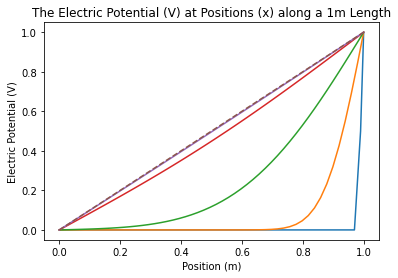

In [3]:
# This code cell applies the averaging function defined in the code cell above iteratively 10000 times. The loop below captures the list of electric potentials at
# varying amounts of times to illustrate how more iterations leads to the difference between the computational and analytical results decreases as the number of iterations increases

# Applies the averaging function to the list of voltages 10000 times while capturing the list of potentials at certain times throughout the iterations
for i in range(10000):
  list_V = average_of_neighbours(list_V)
  if i == 1:
    first_interation = list_V # List of potentials after 1 iteration
  elif i == 100:
    A = list_V # List of potentials after 100 iterations
  elif i == 1000:
    B = list_V # List of potentials after 1000 iterations
  elif i == 5000:
    C = list_V # List of potentials after 5000 iterations
  D = list_V # List of potentials after 10000 iterations

# Plots the potentials as a function of the position x for the various numbers of interations of the averaging function 
plt.plot(list_x, first_interation) # blue line
plt.plot(list_x, A) # orange line
plt.plot(list_x, B) # green line 
plt.plot(list_x, C) # red line
plt.plot(list_x, D) # purple line
plt.plot(list_x, list_x, "--") # dashed brown line
plt.xlabel("Position (m)")
plt.ylabel("Electric Potential (V)")
plt.title("The Electric Potential (V) at Positions (x) along a 1m Length")

**Figure 3.1:** The graph of the electron potential in volts as a function of the position x in meters after 1, 100, 1000, 5000 and 10000 iterations of the averaging function as well as analytical solution. 

**The legend for the above figure is as follows:** \\

Blue: 1 Iteration \\
Orange: 100 Iterations \\
Green: 1000 Iterations \\
Red: 5000 Iterations \\
Purple: 10000 Iterations \\
Dashed Brown: Analytical Solution


We see from the figure above that the computational solution for the electric potential approaches the analytical solution *V(x) = x* as the number of times the discretized form of the 1-d Laplace equation is applied to the electric potential list increases. 

The maximum number of iterations of the 1-d Laplace equation applied to the potential list in this code is 10000. The figure above shows that the potential calculated after 10000 interations (the purple line) appears to almost exactly match the analytical solution (the dashed brown line). The figure below shows the difference between the analytical solution *V(x) = x* and the computation solution after 10000 iterations of the 1-d Laplace equation.


Text(0.5, 1.0, 'The Difference between the Computational and Analytical Solutions for the Electric Potential (V) as a Function of the Position (x)')

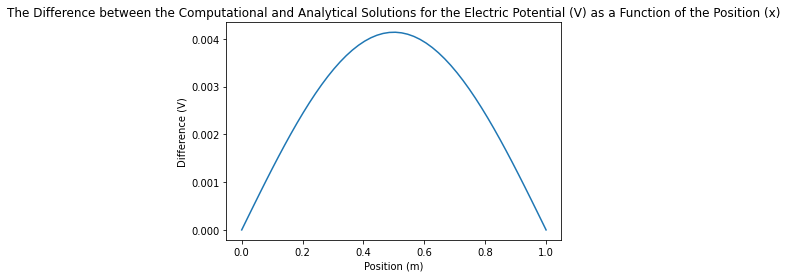

In [4]:
# This code block plots the absolute value of the difference between the computational and analytical solutions after 10000 iterations of the averaging function

# Computes the absolute value of the difference between the computational and analyical solutions
difference = np.abs(D - list_x)

# Plots the absolute value of the difference between the computational and analyical solutions
plt.plot(list_x, difference)
plt.xlabel("Position (m)")
plt.ylabel("Difference (V)")
plt.title("The Difference between the Computational and Analytical Solutions for the Electric Potential (V) as a Function of the Position (x)")

**Figure 3.2**: The absolute value difference between the computational and analytical solutions for the electric potential in volts and a function of the position x in meters. 

The figure above shows that the absolute value of the difference between the computational and analytical solutions for the electric potential *V(x)* is between 0V and 0.004V over the 1 meter length after 10000 interations of the discretized form of the 1-d Laplace equation. 

The analytical value of the potential at the first interior point is *V(0.01) = 0.01V* since we are computing the potential at 100 equally-spaced points along the x-axis. Since the values of the electric potential increase as the position value increases, this is the smallest value of the electric potential that is computed in this problem. Therefore, the largest error between the two solutions (0.004V) is an entire order of magnitude smaller than the computed electric potential values. This is an acceptable error magnitude, so the computational solution reasonably matches the analytical solution after 10000 iterations. 

**Bonus Question** \\

Note: This code takes approximately 2 minutes to run for 5000 iterations.

The code below produces a contour plot representing the electric potential in volts of a 1x1m grid with an electron in the center, i.e. at the position (0.5, 0.5). The electric potential was calculated numerically at 10000 points within the 1x1m grid by iteratively applying the solution to the 2D Poisson equation to each interior point in the grid. It is assumed that the edges of the grid are grounded, i.e the potential is zero along the edges of the grid.

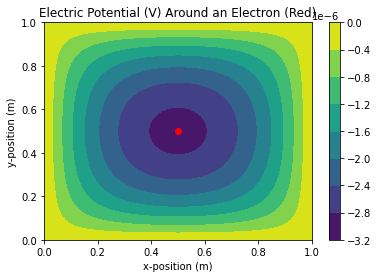

In [5]:
# This code cell calculates the electric potential in volts in a 1x1m grid with an electron at the center of the grid. It displays the electric potential as a contour plot. 
# This code takes approximately 80s to run when max_iterations = 5000

# Initializes the constants used in this code
L = 1 # Side length of the square box in meters
q = -1.602e-19 # Charge in C of the charge in the middle of the box (an electron)
q_x = 0.5 # x-position of the charge in meters
q_y = 0.5 # y-position of the charge in meters
e_0 = 8.854e-12 # Vacuum permitivity constant 
i = 0 # Intializes the position variable i so that the charge density function p can be defined below
j = 0 # Intializes the position variable j so that the charge density function p can be defined below
p = q/(4*np.pi*(np.sqrt((q_x - i)**2 + (q_y - j)**2))**3) # Charge density at the point (i,j) in the array in C/m^3  
f = -p/e_0 # Function that the gradient squared of the potential is equal to 
N = 100 # Number of points along the x and y axes that are going to be used to discretize the space
max_iterations = 5000 # Number of iterations 

# Initializes the array of electric potentials 
array_V = np.zeros((N,N))

# Defines a function which applies the numerical solution of the Poisson equation to the interior points in the 2D voltage array
  # Inputs: an array, an x index in the array, a y index in the array  
def poisson_equation(array, i, j):
  array[i,j] = 0.25*(array[i+1, j] + array[i-1, j] + array[i, j+1] + array[i, j-1] - f) # Numerical solution to the 2D poisson equation
  
# Iteratively applies the numerical solution to the 2D Poission equation N times for each interior element in the 2D-array 
for n in range (max_iterations):
  for i in range(1, N-1): # These ranges ensure that the boundaries of the array remain at 0 volts
    for j in range(1, N-1):
      poisson_equation(array_V, i, j)

# Creates lists of the x and y values 
list_x = np.linspace(0, 1, num=N)
list_y = np.linspace(0, 1, num=N)

# Plots a countour map of the electric potential in the 1x1 meter grid 
plt.title("Electric Potential (V) Around an Electron (Red)")
plt.plot(q_x, q_y, "ro") # Plots the position of the charge q (red dot)
plt.xlabel("x-position (m)")
plt.ylabel("y-position (m)")
plt.contourf(list_x, list_y, array_V)

# Set Colorbar to show the values of the electric potential 
plt.colorbar()

# Show the result in the plot window
plt.show()

**Figure 3.3**: A contour plot representing the electric potential in volts of a 1x1 meter area surrounding an electron. 